In [1]:
using Plots
using PyPlot
import Random 

### Rozmieszczenie każdych możliwych pakietów żywnosciowych

In [2]:
function environment2(n::Int64, m::Int64) 
    """
    funkcja tworząca środowisko wypełnione pakietami
    :param n:Int64: pierwszy wymiar srodowiska 
    :param m:Int64: drugi wymiar
    :return Environment:Array{Int64, 2}: środowisko
    """
    
    if n % 3 != 0
        throw(DomainError(size, "incorrect size"))
    end
    
    Environment = zeros(Int64, n, m)
    
    for i in 2:3:n
        Environment[i,:] = ones(Int64, 1, m)
    end
    return Environment
end

function environment_poison(Environment::Array{Int64, 2})
    """
    funkcja wprowadza do środowiska zatrute oraz puste pakiety
    :param Environment:Array{Int64, 2}: środowisko ze zwykłymi pakietami
    :return Environment:Array{Int64, 2}: 'zatrute' środowisko
    """
    
    n = size(Environment)[1]
    m = size(Environment)[2]
    
    liczba = floor((n/3*m) * 0.15)  #szacowanie około 15? % wszystkich możliwych pakietów
    ilosc_pakietow = rand(1:liczba) + 5  #randomowe przypisanie konkretnej ilości danego rodzaju pakietów w danym wywołaniu
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = -1
    end
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = 0
    end
    
    return Environment
end

environment_poison (generic function with 1 method)

### Funkcja usuwająca konkretną rzecz z macierzy

In [38]:
function remove!(a::Array{Int64, 1}, item::Int64)
    """
    funkcja szuka wskazanych elemntów w macierzy oraz usuwa je
    :param a:Array{Int64, 1}: macierz, z której funckja ma usunąć wskazany element
    :param item:Int64: elemnet do usunięcia
    :return a:Array{Int64, 1}: edytowana macierz
    """
    deleteat!(a, findall(x -> x == item, a))
    return a
end

remove! (generic function with 3 methods)

### Funkcja decydująca o dalszym losie ptaszków

In [4]:
function roll_for_pakiet(some_fate::Int64)
    """
    funckja służy do określania prawdopodobieństwa zadanego zdarzenia;
    jeśli losowa liczba zmieści się w przedziale określonym przez wprowadzoną wartość
    zwracana jest wartość true, w przeciwnym razie - false
    :param some_fate:Int64: procentowa wartość prawdopodobieństwa 
    """
    
    if some_fate < 0 || some_fate > 100
        throw(DomainError("incorrect number"))
    end
    
    fate = rand(1:101)
    if fate <= some_fate
        return true
    end
end

roll_for_pakiet (generic function with 1 method)

### Funkcja generująca rozstawienie ptaków w środowisku

In [57]:
function find_place(macierz::Array{Int64, 2}, g::Int64, ja::Int64, ch_g::Int64, ch_j::Int64)
    """
    funkcja losowo wprowadza ptaki do wygenerowanego środowiska z dobrymi pakietami. 
    Następnie je zatruwa z użyciem funkcji enviroment_poison, jeżeli jest nadwyżka ilości
    ptaków względem miejsc - wysyła pozostałe zwierzęta do "fight clubu"
    :param macierz:Array{Int64, 2}: środowisko z dobrymi pakietami do którego mają zostać wprowadzone ptaki
    :param g:Int64: ilość gołębii
    :param ja:Int64: ilość jastrzębi
    :param ch_g:Int64: ilość chorych gołębi
    :param ch_j:Int64: ilość chorych jastrzębi
    :return : macierz gotowego środowiska; ilość ptaków, które się nie zmieścily, odpowiednio:
    gołębie, jastrzębie, chore gołębiem chore jastrzębie
    """
    n = size(macierz)[1]
    m = size(macierz)[2]
    slots = 2*n*m/3
    amount_of_birds = g + ja + ch_g + ch_j
    birds = [7, 10, 70, 100] ##gołąb-7, jastrząb-10, chory gołąb -10, chory jastrząb - 100
    any_bird = [g, ja, ch_g, ch_j] ###ilość każdego z ptaków
    
    if amount_of_birds > slots ###jeśli ptaków jest więcej niż miejsc - iteracja po miejscach
        rozstaw_ptaszki(slots, macierz, any_bird, birds)
        
    elseif slots > amount_of_birds ###jeśli miejsc jest więcej niż ptaków - iteracja po ptakach
        rozstaw_ptaszki(amount_of_birds, macierz, any_bird, birds)
        
    end
    macierz = environment_poison(macierz) ##zatruwamy środowisko
    
    ###sprawdzenie nadpopulacji
    
    f_gol = 0
    f_jas = 0
    f_chg =0 
    f_chj = 0
    
    if length(birds) != 0
        for i in 1:length(birds)
            if birds[i] == 7
                f_gol += any_bird[i]
            elseif birds[i] == 10
                f_jas += any_bird[i]
            elseif birds[i] == 70
                f_chg += any_bird[i]
            elseif birds[i] == 100
                f_chj += any_bird[i]
            end
        end
    end
    
    return macierz, f_gol, f_jas, f_chg, f_chj ###zwraca macierz środowiska, ilość ptaków w nim oraz tych do fight clubu
end

find_place (generic function with 2 methods)

In [46]:
function rozstaw_ptaszki(n::Int64, macierz::Array{Int64, 2}, any_bird::Array{Int64, 1}, birds::Array{Int64, 1})
    """
    funkcja rozstawia losowo ptaki w zadanym środowisku, jeśli liczba jakiegoś gatunku wyniesie 0, usuwa je z listy możliwych ptaków 
    do rozstawienia
    :param n:Int64: ilość ptaków w środowisku
    :param macierz:Array{Int64, 2}: środowisko
    :param any_bird:Array{Int64,1}: tablica ilości ptaków konkretnego gatunku
    :param birds:Array{Int64,1}: tablica wartości im odpowiadających
    """
    for i in 1:n
        pustka = findall(x -> x == 0, any_bird)
        pustka = reverse(pustka)
        if length(pustka) != 0
            for k in pustka
                n = birds[k]
                birds = remove!(birds, n)
            end
            any_bird = remove!(any_bird, 0)
        end
        number = rand(1:length(birds))
        current_bird = birds[number]
        z = findall(x -> x == 0, macierz)
        macierz[rand(z)] = current_bird
        any_bird[number] -= 1
    end

end

rozstaw_ptaszki (generic function with 2 methods)

### Potyczki przy pakietach

In [7]:
function death(bird::Int64, deadliness::Int64)
    """
    funckja w zależności od wprowadzonej śmiertelności determinuje czy dany ptak 
    przeżyje konkretne wywołanie 'pokolenie'
    :param bird:Int64: ilość populacji gatunku na moment wywołania funkcji
    :param deadliness:Int64: procentowa śmiertelność 
    :return bird:Int64: ilość ptaków
    """
    
    if deadliness < 0 || deadliness > 100
        throw(DomainError("incorrect number"))
    end
    
    for _ in 1:bird
        if roll_for_pakiet(deadliness) == true
            bird -= 1
        end
    end
    return bird
end

death (generic function with 1 method)

In [8]:
function sickness(ch_g::Int64, ch_j::Int64, deadliness::Int64)
    """
    funckja w zależności od zadanej śmietelności choroby, zabija chorą część
    populacji obu gatunków
    :param ch_g:Int64: ilość chorych gołębii
    :param ch_j:Int64: ilość chorych jastrzębii
    :param deadliness:Int64: śmiertelność w procentach
    :retrun : pozostała ilość chorych ptaków
    """
    
    ch_g = death(ch_g, deadliness)
    
    ch_j = death(ch_j, deadliness)
    
    return ch_g, ch_j
end

sickness (generic function with 1 method)

### optymalizacja

In [43]:
function potyczki(n::Int64, m::Int64, macierz::Array{Int64, 2}, deadliness::Int64, g::Int64, ja::Int64, ch_g = 0, ch_j = 0)
    """
    funckja sprawdza jaki pakiet jest na konkretnym miejscu środowiska, następnie zliczając sumę (aby określić
    jakie ptaki 'siedzą' przy pakiecie) i w zależności od niej, symuluje konkretne spotaknie i zachowania ptaków
    :param n:Int64: pierwszy wymiar srodowiska 
    :param m:Int64: drugi wymiar
    :param macierz:Array{Int64, 2}: środowisko
    :param deadliness:Int64: śmiertelność w procentach
    :param g:Int64: ilość gołębi
    :param ja:Int64: ilość jastrzębi
    :param ch_g:Int64: ilość chorych gołębi
    :param ch_j:Int64:  ilość chorych jastrzębi  
    :return: ilości poszczególnych gatunków po potyczkach
    """
    for i in 2:3:n, j in 1:m    
        suma = macierz[i - 1, j] + macierz[i + 1, j]
        
        if macierz[i, j] == 1
            result = pot_norm(suma, g, ja, ch_g, ch_j)
            g = result[1]
            ja= result[2]
            ch_g = result[3]
            ch_j = result[4]
            
        elseif macierz[i,j] == 0
            result = pot_pust(suma, g, ja, ch_g , ch_j )
            g = result[1]
            ja= result[2]
            ch_g = result[3]
            ch_j = result[4]
            
        elseif macierz[i, j] == -1
            result = pot_zatr(suma, g, ja, ch_g, ch_j)
            g = result[1]
            ja= result[2]
            ch_g = result[3]
            ch_j = result[4]
        end
    end
    
    sick_birds = sickness(ch_g, ch_j, deadliness)
    ch_g = sick_birds[1]
    ch_j = sick_birds[2]

    return g, ja, ch_g, ch_j
end 

potyczki (generic function with 6 methods)

In [11]:
function pot_norm(suma::Int64, g::Int64, ja::Int64, ch_g = 0, ch_j = 0) 
    """
    funckja symuluje sytuacjem które mają miejsce przy zwykłym pakiecie żywnościowym
    :param suma:Int64: suma sprawdzająca jakie patki 'siedzą' przy pakiecie
    :param g:Int64: ilość gołębi
    :param ja:Int64: ilość jastrzębi
    :param ch_g:Int64: ilość chorych gołębi
    :param ch_j:Int64: ilość chorych jastrzębi  
    :return: ilości poszczególnych gatunków po potyczkach
    """
    if suma == 7 ##sam gołąb
        g += 1
        
    elseif suma == 10                                ###jastrząb
        ja += 1
        
    elseif suma == 70                                 ##chory goł
        if roll_for_pakiet(25) == true               #szansa na wyzdrowienie
            ch_g -= 1
            g += 1
        else                                            ##zrodzenie chorego gołąbka
            ch_g += 1
        end
        
    elseif suma == 100                                   ##chory jastrz
        if roll_for_pakiet(25) == true                   #szansa na wyzdrowienie
            ch_j -= 1
            ja += 1
        else
            ch_j += 1                                   #zrodzenie jastrzebia 
        end
        
    elseif suma == 20                                   #dwa jastr - biją się
        ja -= 2
        
    elseif suma == 200                                   #dwa chore jastr- bitka
        ch_j -= 2
        
    elseif suma == 17 
        ja += 1                                           #jastrz się rozmnaża
        g -= death(1, 50)                                ##gołąb ma 50%szans na ucieczke
        
    elseif suma == 170                                    #chory gołąb + ch jastrz
        ja += 1 #jastrz zdrowieje, chory gołąb ginie
        ch_j -=1
        ch_g -=1
        
    elseif suma == 77 ##chory g + zdrowy g
        if roll_for_pakiet(80) == true
            ch_g += 1
        end
        
    elseif suma == 80 #jastrzab + chg
        ch_g -= 1 ##chory gołąb ginie
        if roll_for_pakiet(60) == true ##60% szans na zachorowanie jastrzebia
            ja -= 1
            ch_j += 1
        end    
        
    elseif suma == 107 ###chory jastrz + zdrowy goł
        if roll_for_pakiet(60) == true # 60% szans na zachorowanie gołębia
            g -= 1
            ch_g += 1
        end
        if roll_for_pakiet(25) == true ##25% szans na wyzdrowienie jastrz
            ch_j -= 1
            ja += 1
        else
            ch_j += 1 # ewentualnie zrodzenie ch jastrząbka
        end
        
    elseif suma == 110 #chory jastrz + zdrowy jastrz
        ch_j -= 1 ##zdrowy zabija chorego
        if roll_for_pakiet(20) == true ##20% szansy na unikniecie choroby i zrodzenie jastrząbka
            ja += 1
        else
            ja -= 1
            ch_j += 1 ##80% szansy na zachorowanie
        end
    end
    
    return g, ja, ch_g, ch_j
end

pot_norm (generic function with 3 methods)

In [12]:
function pot_zatr(suma::Int64, g::Int64, ja::Int64, ch_g = 0, ch_j = 0) 
    """
    funckja symuluje sytuacjem które mają miejsce przy zatrutym pakiecie żywnościowym
    :param suma:Int64: suma sprawdzająca jakie patki 'siedzą' przy pakiecie
    :param g:Int64: ilość gołębi
    :param ja:Int64: ilość jastrzębi
    :param ch_g:Int64: ilość chorych gołębi
    :param ch_j:Int64:  ilość chorych jastrzębi  
    :return: ilości poszczególnych gatunków po potyczkach
    """
    
    if suma == 7 #gołab
        g = g - 1 
        if roll_for_pakiet(70) == true #szansa na zachorowanie, 30% na śmierć
            ch_g += 1
        end       
        
    elseif suma == 10 #jastrzab umiera
        ja = ja-1
        if roll_for_pakiet(10) == true #szansa na zachorowanie, 90% na śmierć
            ch_j += 1
        end       
        
    elseif suma == 70 ##chory gołab umiera
        ch_g -= 1
        
    elseif suma == 100 #chory jastrzab umiera
        ch_j -= 1
        
    elseif suma == 14 ##dwa gołebie
        g -= 2
        if roll_for_pakiet(60) == true ##60% szansy na zachorowanie, 40 - śmierć
            ch_g += 2
        end
        
    elseif suma == 140 #dwa chore gołębie
        ch_g -= 2
        if roll_for_pakiet(10) == true ##10%szans na przeżycie
            ch_g += 2
        end
        
    elseif suma == 20 #dwa jastrzebie - biją się, ale jeden przeżywa
        ja -= 1
        
    elseif suma == 200 #dwa chore jastrz - bitka
        ch_j -= 2
        
    elseif suma == 17 ## jastrz + gołąb
        g -= 1 #gołab umiera
        ja -= 1
        if roll_for_pakiet(40) == true ## szansa na zachorowanie, w innym wypadku śmierć
            ch_j += 1
        end 
        
    elseif suma == 170 ##chj + chg
        ch_g -= 1 #chory gołab umiera
        ch_j -= death(1, 70) #chory jastrzab umiera (70%)
        
    elseif suma == 77 ##chory gołab + zdrowy gołąb
        g -= 1
        if roll_for_pakiet(20) == true ##zdrowy choruje, chory ma 20% na przeżycie
            ch_g += 1
        end
        
    elseif suma == 80 ##chory g + jastrz
        ch_g -= 1 #chg umiera
        ja -= 1
        if roll_for_pakiet(70) == true #jastrzab ma 70% na chorobe, 30 na śmierć
            ch_j += 1
        end
        
    elseif suma == 107 #chory jastrzab, gołąb
        g -= 1
        if roll_for_pakiet(60) == true #gołąb ma większą szansę na ucieczke, ale choruje
            ch_g += 1
        end
        ch_j -= death(1, 80) #jastrzab umiera po zjedzeniu zatr.p
        
    elseif suma == 110 #jastrz + chj
        ja -= 1 ##chj umiera, ten zdrowy choruje
    end
    
    return g, ja, ch_g, ch_j
end

pot_zatr (generic function with 3 methods)

In [13]:
function pot_pust(suma, g, ja, ch_g = 0, ch_j = 0) 
    """
    funckja symuluje sytuacjem które mają miejsce jak nie ma żadnego pakietu żywnościowego
    :param suma:Int64: suma sprawdzająca jakie patki 'siedzą' przy pakiecie
    :param g:Int64: ilość gołębi
    :param ja:Int64: ilość jastrzębi
    :param ch_g:Int64: ilość chorych gołębi
    :param ch_j:Int64:  ilość chorych jastrzębi  
    :return: ilości poszczególnych gatunków po potyczkach
    """
    
    if suma == 7 ## gołąb
        g -= 1 #gołąb umiera 
        
    elseif suma == 10 #jastrz
        ja -= 1 #jstr umiera
        
    elseif suma == 70 #chg
        ch_g -= 1
        
    elseif suma == 100 #chj
        ch_j -= 1
        
    elseif suma == 14 #2 g
        g -= 2
        
    elseif suma == 140 # 2chg
        ch_g -= 2
        
    elseif suma == 20 #2j
        ja -= 1
        
    elseif suma == 200 #2 chj
        ch_j -= 2
        
    elseif suma == 17 #gołąb + jastrząb
        g -= 1
        
    elseif suma == 170 #chory jastr + ch gołąb
        ch_g -= 1
        ch_j -= 1
        
    elseif suma == 77 #chg + g
        ch_g -= 1
        g -= 1
        
    elseif suma == 80 #chg + jastrz
        g -= 1
        ja -= 1
        ch_j += 1
        
    elseif suma == 107 #chj + g
        g -= 1
        ch_j -= 1
        
    elseif suma == 110 #chj + j
        ja -= 1
    end
    
    return g, ja, ch_g, ch_j
end
        

pot_pust (generic function with 3 methods)

### Fight club

In [48]:
function ptaszki(macierz::Array{Int64,1}, n::Int64, k::Int64) 
    """
    funkcja rozmieszcza w 'fight clubie' ptaki, które nie zmieściły się w środowisku
    :param macierz:Array{Int64,1}: fight club
    :param n:Int64: ilość konkretnego gatunku
    :param k:Int64: numer przypisany do wprowadzanego ptaka (np. gołąb - 7)
    """
    if n != 0  
        for i in 1:1:n
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = k
        end
    end
end

ptaszki (generic function with 2 methods)

### Funkcja tworząca macierz do przeprowadzenia walk

In [49]:
function fight_club2(g::Int64, j::Int64, ch_g::Int64, ch_j::Int64)
    """
    funckja tworzy macierz odpowiadająca za przeprowadzenie walka 1 na 1 (fight club)
    :param g:Int64: ilość 'walczących' gołębi
    :param ja:Int64: ilość 'walczących' jastrzębi
    :param ch_g:Int64: ilość 'walczących' chorych gołębi
    :param ch_j:Int64: ilość 'walczących' chorych jastrzębi 
    :return fight_macierz:Array{Int64,1}: macierz 'fight club'
    """
    
    all_birds = g + j + ch_g + ch_j
    
    if all_birds!= 0
        if all_birds%2 == 0
            fight_macierz = rozstaw_ptaszki_fight(all_birds, g, j, ch_g, ch_j)
        else
            all_birds += 1
            fight_macierz = rozstaw_ptaszki_fight(all_birds, g, j, ch_g, ch_j)
        end
        
        return fight_macierz
    end
end     

fight_club2 (generic function with 1 method)

In [50]:
function rozstaw_ptaszki_fight(n::Int64, g::Int64, j::Int64, ch_g::Int64, ch_j::Int64)
    """
    funckja rozstawia w 'fight clubie' ptaki, które nie zmieściły się do środowiska
    :param n:Int64: suma wszystkich ptaków do rozstawienia
    :param g:Int64: ilość 'walczących' gołębi
    :param ja:Int64: ilość 'walczących' jastrzębi
    :param ch_g:Int64: ilość 'walczących' chorych gołębi
    :param ch_j:Int64: ilość 'walczących' chorych jastrzębi 
    :return fight_macierz:Array{Int64,1}: macierz 'fight club'
    """
    m = Int64(n/2)
    fight_macierz = zeros(Int64, 2, m)
    ptaszki(fight_macierz, g, 7)
    ptaszki(fight_macierz, j, 10)
    ptaszki(fight_macierz, ch_g, 70)
    ptaszki(fight_macierz, ch_j, 100)
    
    return fight_macierz
end

rozstaw_ptaszki_fight (generic function with 1 method)

### Fight

In [51]:
function fight2(macierz::Array{Int64,1}, g::Int64, j::Int64, ch_g::Int64, ch_j::Int64)
    """
    funckja przeprowadza walki w fight clubie w zależności od wybranej strategii
    :param macierz:Array{Int64,1}: macierz 'fight club'
    :param g:Int64: ilość 'walczących' gołębi
    :param ja:Int64: ilość 'walczących' jastrzębi
    :param ch_g:Int64: ilość 'walczących' chorych gołębi
    :param ch_j:Int64: ilość 'walczących' chorych jastrzębi 
    :return : ilość poszczególnych ptakó po walkach
    """
    
    m = size(macierz)[2]
    for i in 1:m
        suma = macierz[1, i] + macierz[2, i]
        if suma == 7 || suma == 14 || suma == 77  
            #sam g, gg, g chg 
            g -= 1
            
        elseif suma == 10 || suma == 20 || suma == 110   
            #sam j, jj, j chj 
            j -= 1
            
        elseif suma == 70 || suma == 140 
            #sam chg, chg chg
            ch_g -= 1
            
        elseif suma == 100 || suma == 200   
            #sam chj, chj chj
            ch_j -= 1
            
        elseif suma == 17   #g, j
            if roll_for_pakiet(66) == true
                g -= 1
            else 
                j -= 1
            end  
            
        elseif suma == 107   #chj, g
            g -= 1
            if roll_for_pakiet(66) == false
                ch_j -= 1
                ch_g += 1
            end  
            
        elseif suma == 80 #chg, j
            j -= 1
            if roll_for_pakiet(66) == true
                ch_j += 1
                ch_g -= 1
            end   
            
        elseif suma == 170  #chg, chj
            if roll_for_pakiet(66) == true
                ch_g -= 1
            else
                ch_j -= 1
            end 
            
        end
    end
    
    return g, j, ch_g, ch_j
end

fight2 (generic function with 2 methods)

### główna funkcja

In [55]:
function action2(n::Int64, m::Int64, g::Int64, j::Int64,
        ch_g::Int64, ch_j::Int64, p::Int64, deadliness::Int64, A = [], index = 1)
    """
    Główna funkcja do przeprowadzenia symulacji
    :param n:Int64: pierwszy wymiar srodowiska 
    :param m:Int64: drugi wymiar
    :param g:Int64: ilość gołębi
    :param ja:Int64: ilość jastrzębi
    :param ch_g:Int64: ilość chorych gołębi
    :param ch_j:Int64:  ilość chorych jastrzębi
    :param p:Int64: ilość wywołań rekurencyjnych funkcji
    :param deadliness:Int64: śmiertelnośc w procentach
    :param A:Array{Int64,2}: macierz z wynikiem każdego wywołania
    :return: informacja o przebiegu symulacji
    """
    
    if p == 0
        println("they made it")
        return A
    end
    
    max_amount = 2/3*m*n
    amount_of_birds = g+j+ch_g+ch_j
    srodowisko = environment2(n, m)
    first_try = find_place(srodowisko, g, j, ch_g, ch_j) 
    macierz = first_try[1]
    f_gol = first_try[2] 
    f_jas = first_try[3]
    f_chg =  first_try[4] 
    f_chja = first_try[5] 
    fight = fight_club2(f_gol, f_jas, f_chg, f_chja)
    g_p = length(findall(x -> x == 7, macierz))
    j_p = length(findall(x -> x == 10, macierz))
    chg_p = length(findall(x -> x == 70, macierz))
    chj_p = length(findall(x -> x ==100, macierz))
    
    potyczki_result = potyczki(n, m, macierz, g_p, j_p, chg_p, chj_p, deadliness)


    if amount_of_birds > max_amount
        fight = fight_club2(f_gol, f_jas, f_chg, f_chja)
        fight_result = fight2(fight, f_gol, f_jas, f_chg, f_chja)
        final_g = potyczki_result[1] + fight_result[1]
        final_j = potyczki_result[2] + fight_result[2]
        final_chg = potyczki_result[3] + fight_result[3]
        final_chj = potyczki_result[4] + fight_result[4]
    else
        final_g = potyczki_result[1] 
        final_j = potyczki_result[2] 
        final_chg = potyczki_result[3] 
        final_chj = potyczki_result[4] 
    end
    
    if final_g <0
        final_g =0
    elseif final_j<0
        final_j = 0
    elseif final_chg<0
        final_chg = 0
    elseif final_chj<0
        final_chj = 0
    end

    if index == 1
        A = [final_g final_j final_chg final_chj]
    else
        A = vcat(A,[final_g final_j final_chg final_chj])
    end
    
    #println(final_g,", ", final_j,", ", final_chg, ", ",final_chj)
    
    if final_g == 0 && final_j == 0 && final_chg == 0 && final_chj == 0
        println("they all died")
        return A
    end
    
    
    action2(n, m , final_g, final_j, final_chg,final_chj, p-1, deadliness, A, index+1)
end

action2 (generic function with 9 methods)

In [58]:
action2(12, 12, 50, 50, 50, 50, 30, 5)

they made it


30×4 Array{Int64,2}:
  3  27  25  28
 23  17  10   0
  4  16   0   6
 16   2   7   4
  7   6   3   3
  9   5   5   7
  6   6   6   6
  8  14   2   4
 13   0   7   6
  2  10   3   1
 12   5   0   7
  3   4   9   2
  5   7   0   6
  ⋮          
  6   6   9   6
  4  11   6   5
 13   8   3   7
  7   4   5   0
  5   7   3   4
  6   3   5   6
  2   8  10   6
  7   9   5   4
 10  11   0   5
 14   0   5  10
  0   7  10   1
  7  13   1   4

In [59]:
function wykresy_all(gif_name,n,m, g,j,ch_g,ch_j,p, deadliness)
    """
    funkcja do wizualizacji przeprowadzonych symulacji
    """
    result = action2(n,m, g,j,ch_g,ch_j,p, deadliness)
    animation = @animate for i in 1:size(result)[1]
        Plots.plot(1:i, result[1:i,1], label="gołębie")
        Plots.plot!(1:i, result[1:i,2], label="jastrzębie")
        Plots.plot!(1:i, result[1:i,3], label="chore gołębie")
        Plots.plot!(1:i, result[1:i,4], label="chore jastrzębie")
    end
    gif(animation, gif_name, fps = 5)
end

wykresy_all (generic function with 1 method)

they made it


┌ Info: Saved animation to 
│   fn = C:\Users\Alutka\Documents\GitHub\pakiety\animation7.gif
└ @ Plots C:\Users\Alutka\.julia\packages\Plots\z5Msu\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Alutka\\Documents\\GitHub\\pakiety\\animation7.gif")
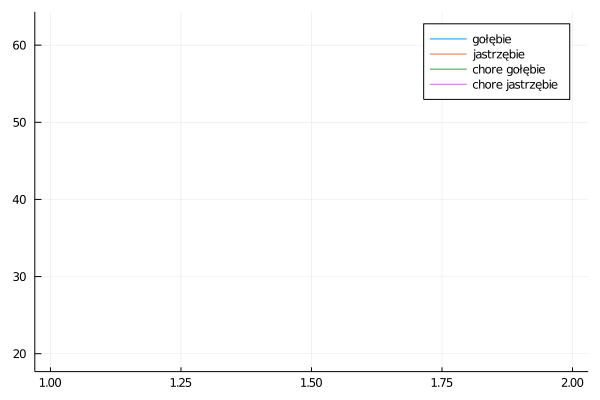

In [61]:
wykresy_all("animation7.gif",15,15,50,50,100,135,50, 5)